# Ocorrencia com Todos os Répteis 

Nesse Notebook trabalharemos somente com as ocorrencias que estiverem associadas aos atropelamento de Répteis e Faixas de Kilometros.
Iniciaremos importando os dados ja corrigidos previamente e as bibliotecas.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dc = pd.read_csv('dadoscorrigidos.csv')
tbanimal = pd.read_csv('animal.csv')

In [2]:
dc.head(10)

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Taxonomia,Ave,Mamifero,Reptil,Anfibio
0,5,334,2,1,0,0,0,0,0,0,1,5,3,1,0,0,0
1,5,1,2,1,0,0,0,0,0,0,1,6,3,1,0,0,0
2,5,18,4,1,1,0,1,0,0,0,1,6,3,1,0,0,0
3,5,361,4,1,1,0,0,0,0,0,1,5,3,1,0,0,0
4,4,48,4,1,0,0,1,0,0,0,1,5,3,1,0,0,0
5,2,329,4,1,0,0,1,1,0,0,1,6,3,1,0,0,0
6,2,286,4,1,1,1,1,0,1,1,0,6,3,1,0,0,0
7,4,362,4,1,0,0,0,0,1,0,1,5,1,0,0,0,1
8,5,363,2,1,0,0,0,0,0,0,1,6,4,0,1,0,0
9,4,364,4,1,1,0,0,0,0,0,1,6,4,0,1,0,0


Agora removeremos todos os atributos que não forem relevantes para as ocorrencias com os Anfibios.

In [3]:
reptdc = dc.drop(['Taxonomia','codAnimal', 'Mamifero', 'Anfibio', 'Ave'], axis=1)
reptdc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Reptil
0,5,2,1,0,0,0,0,0,0,1,5,0
1,5,2,1,0,0,0,0,0,0,1,6,0
2,5,4,1,1,0,1,0,0,0,1,6,0
3,5,4,1,1,0,0,0,0,0,1,5,0
4,4,4,1,0,0,1,0,0,0,1,5,0


Em seguida é demonstrado o grafico de correlação de atributos de pearson

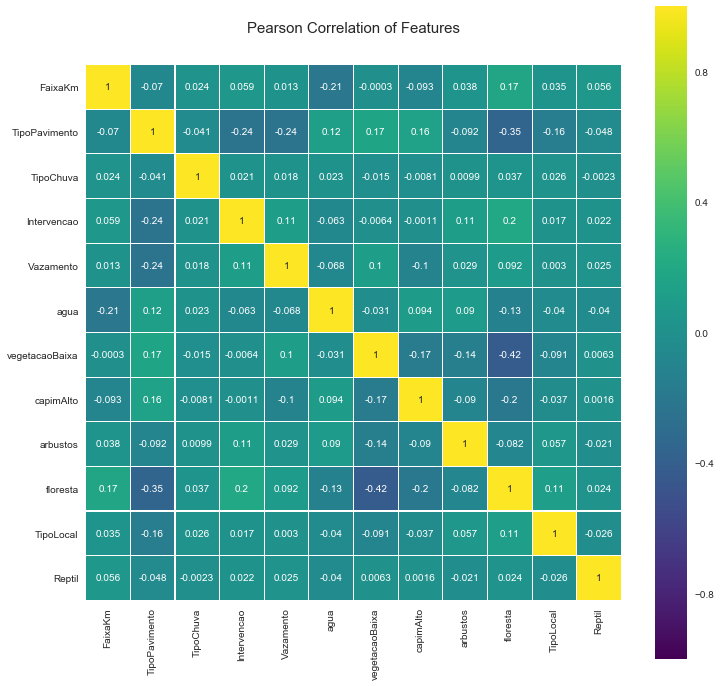

In [4]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(reptdc.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Em seguida alteramos os dados para que cada dado de uma ocorrencia esteja associada a seu respectivo atributo.

In [5]:
reptasc = reptdc
headers = ['FaixaKm','TipoPavimento','TipoChuva','Intervencao',
           'Vazamento','agua','vegetacaoBaixa','capimAlto','arbustos','floresta','TipoLocal','Reptil']
for i in range(len(headers)):
    reptasc[headers[i]] = headers[i]+'='+reptasc[headers[i]].apply(str)

reptasc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Reptil
0,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Reptil=0
1,FaixaKm=5,TipoPavimento=2,TipoChuva=1,Intervencao=0,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,Reptil=0
2,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=6,Reptil=0
3,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=1,Vazamento=0,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Reptil=0
4,FaixaKm=4,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=0,agua=1,vegetacaoBaixa=0,capimAlto=0,arbustos=0,floresta=1,TipoLocal=5,Reptil=0


Enfim aplicaremos o Apriori usando suporte minimo de 0.03 e confianca de 0.8

In [6]:
listreptasc = []
for i in range(len(reptasc)):
    listreptasc.append([str(reptasc.values[i, j]) for j in range(0, 12)])

from apyori import apriori
regras = apriori(listreptasc, min_support=0.03, min_confidence=0.8, min_lenght=2)

resultados = list(regras)
resultados2 = [list(x) for x in resultados]
resultadosFormatado = []
for j in range(0,3000):#numero de regras que deseja mostrar
       resultadosFormatado.append([list(x) for x in resultados2[j][2]])
resultdf = pd.DataFrame(resultadosFormatado)
resultdf.to_csv('reptregras.csv', index=False, header=False)

Porem por mais que aumentemos a quantidade de regras não foi possivel achar nenhuma associação entre as ocorrencias com Repteis e as Faixas de Km

|SE|E|E|ENTÃO|SUPORTE|LIFT|
|:---|:---|:---|:---|:---|
|Reptil=1|||TipoChuva=1|0.9636752136752137|1.0073349249649828|
|Reptil=1|||capimAlto=0|0.8098290598290598|0.9971597790423701|
|Intervencao=0|Reptil=1||TipoChuva=1|0.9702702702702702|1.0142287733757815|
|Intervencao=0|Reptil=1||TipoPavimento=4|0.8513513513513513|1.0219576411718498|
|TipoPavimento=4|Reptil=1||Intervencao=0|0.8725761772853186|1.0628813402905637|
|Vazamento=0|Reptil=1||Intervencao=0|0.8467432950191571|1.031414415979097|
|arbustos=0|Reptil=1||Intervencao=0|0.8271604938271605|1.0075606889127127|
|Intervencao=0|Reptil=1||capimAlto=0|0.8|0.985057048214943|
|floresta=0|Reptil=1||Intervencao=0|0.9262295081967213|1.1282362350890702|
|TipoLocal=5|Reptil=1||TipoChuva=1|0.9642857142857142|1.0079730845626798|
|TipoPavimento=4|Reptil=1||TipoChuva=1|0.9722991689750693|1.0163495921906247|
|Vazamento=0|Reptil=1||TipoChuva=1|0.9693486590038316|1.013265408122893|
|agua=0|Reptil=1||TipoChuva=1|0.9641873278236914|1.0078702406605717|
|arbustos=0|Reptil=1||TipoChuva=1|0.9629629629629629|1.006590405434336|
|TipoChuva=1|Reptil=1||capimAlto=0|0.8070953436807096|0.9937936960926808]|
|capimAlto=0|Reptil=1||TipoChuva=1|0.9604221635883905|1.0039344940743509|
|floresta=0|Reptil=1||TipoChuva=1|0.9795081967213115|1.0238852279741126|
|floresta=1|Reptil=1||TipoChuva=1|0.9464285714285715|0.9893069163300378|
|vegetacaoBaixa=0|Reptil=1||TipoChuva=1|0.9510204081632652|0.9941067881612884|
|vegetacaoBaixa=1|Reptil=1||TipoChuva=1|0.9775784753363229|1.0218680797493105|
|TipoLocal=5|Reptil=1||TipoPavimento=4|0.8311688311688311|0.9977306511213938|
|TipoLocal=5|Reptil=1||capimAlto=0|0.8051948051948051|0.9914535225540009|
|Vazamento=0|Reptil=1||TipoPavimento=4|0.89272030651341|1.0716167152639444|
|floresta=0|Reptil=1||TipoPavimento=4|0.9713114754098361|1.1659571370590622|
|vegetacaoBaixa=1|Reptil=1||TipoPavimento=4|0.9192825112107624|1.1035018447275227|
|Vazamento=0|Reptil=1||capimAlto=0|0.8045977011494253|0.990718295618477|
|agua=0|Reptil=1||capimAlto=0|0.8292011019283747|1.0210129873026785|
|floresta=1|Reptil=1||capimAlto=0|0.8973214285714286|1.104890997160734|
|TipoLocal=5|Intervencao=0|Reptil=1|TipoChuva=1|0.9748953974895397|1.019063443931028|
|TipoChuva=1|Intervencao=0|Reptil=1|TipoPavimento=4|0.8579387186629527|1.0298650819113413|
|TipoPavimento=4|Intervencao=0|Reptil=1|TipoChuva=1|0.9777777777777779|1.0220764116717873|
|TipoChuva=1|TipoPavimento=4|Reptil=1|Intervencao=0|0.8774928774928775|1.068870351957918]",
|Vazamento=0|Intervencao=0|Reptil=1|TipoChuva=1|0.9773755656108597|1.0216559771133045|
|TipoChuva=1|Vazamento=0|Reptil=1|Intervencao=0|0.8537549407114624|1.0399552718551601|
|agua=0|Intervencao=0|Reptil=1|TipoChuva=1|0.9717314487632509|1.0157561511755837|
|arbustos=0|Intervencao=0|Reptil=1|TipoChuva=1|0.9738805970149252|1.0180026674936518|
|arbustos=0|TipoChuva=1|Reptil=1|Intervencao=0|0.8365384615384616|1.0189839516027392|
|capimAlto=0|Intervencao=0|Reptil=1|TipoChuva=1|0.9695945945945945|1.013522485929141|
|floresta=0|Intervencao=0|Reptil=1|TipoChuva=1|0.9778761061946902|1.022179194899027|
|floresta=0|TipoChuva=1|Reptil=1|Intervencao=0|0.9246861924686193|1.1263563287470475|
|TipoLocal=5|Intervencao=0|Reptil=1|TipoPavimento=4|0.9246861924686193|1.1099883950139096|
|TipoLocal=5|TipoPavimento=4|Reptil=1|Intervencao=0|0.86328125|1.0515592287911888|
|Vazamento=0|Intervencao=0|Reptil=1|TipoPavimento=4|0.9095022624434389|1.091761686043963|
|Vazamento=0|TipoPavimento=4|Reptil=1|Intervencao=0|0.8626609442060087|1.0508036369347178|
|agua=0|Intervencao=0|Reptil=1|TipoPavimento=4|0.8233215547703179|0.9883108222045563|
|agua=0|TipoPavimento=4|Reptil=1|Intervencao=0|0.8597785977859779|1.0472926629867063|
|arbustos=0|Intervencao=0|Reptil=1|TipoPavimento=4|0.8432835820895521|1.0122731337928226|
|arbustos=0|TipoPavimento=4|Reptil=1|Intervencao=0|0.889763779527559|1.0838174856761147|
|capimAlto=0|Intervencao=0|Reptil=1|TipoPavimento=4|0.8175675675675675|0.9814037665221733|
|capimAlto=0|TipoPavimento=4|Reptil=1|Intervencao=0|0.8736462093862817|1.0641847418539252|
|floresta=0|Intervencao=0|Reptil=1|TipoPavimento=4|0.9778761061946902|1.1738372849925856|
|floresta=0|TipoPavimento=4|Reptil=1|Intervencao=0|0.9324894514767932|1.1358614454453346|
|agua=0|arbustos=0|Reptil=1|Intervencao=0|0.8139534883720929|0.991473291588872|
|agua=0|Intervencao=0|Reptil=1|capimAlto=0|0.8268551236749117|1.0181243342857624|
|capimAlto=0|arbustos=0|Reptil=1|Intervencao=0|0.8203125|0.9992191766794102|

# Ocorrencias com o Anfibio mais Atropelado

Para trabalharmos somente com os Anfibios mais atropelados precisamos primeiro remover as ocorrencias com as outras taxonomias.

In [7]:
reptdc = dc.drop(['Taxonomia', 'Mamifero', 'Ave', 'Anfibio'], axis=1)
reptdc = reptdc[reptdc.Reptil == 1]
reptdc.head()

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Reptil
69,2,93,4,1,0,1,1,1,1,0,0,5,1
117,5,91,4,1,0,1,0,1,1,0,0,6,1
214,5,341,1,1,0,1,0,0,0,1,1,6,1
219,4,341,4,1,0,1,1,1,1,0,0,6,1
274,6,323,1,1,0,1,1,1,0,1,0,7,1


Em seguida selecionaremos os animais com maiores numeros de ocorrencia

In [8]:
reptdc.groupby('codAnimal').size().sort_values(ascending=False).head(3)

codAnimal
75     51
119    47
62     44
dtype: int64

Agora iremos na tabela dos animais identificar qual é o animal mais atropelado

In [9]:
tbanimal[tbanimal.codAnimal == 75]

,codAnimal,nomeComum,nomeCientifico,codGrupoTax,codValorBiologico
67,75,cascavel,Crotalus durissus,2,0


Agora que ja identificamos o nome do animal mais atropelado, criaremos uma tributo novo separando qual é a ave mais atropelada e qual não é

In [10]:
reptdc['Cascavel'] = (reptdc['codAnimal'] == 75)*1
reptdc.head()

,FaixaKm,codAnimal,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Reptil,Cascavel
69,2,93,4,1,0,1,1,1,1,0,0,5,1,0
117,5,91,4,1,0,1,0,1,1,0,0,6,1,0
214,5,341,1,1,0,1,0,0,0,1,1,6,1,0
219,4,341,4,1,0,1,1,1,1,0,0,6,1,0
274,6,323,1,1,0,1,1,1,0,1,0,7,1,0


Correlação de Pearson para os atributos e o Anú-Preto

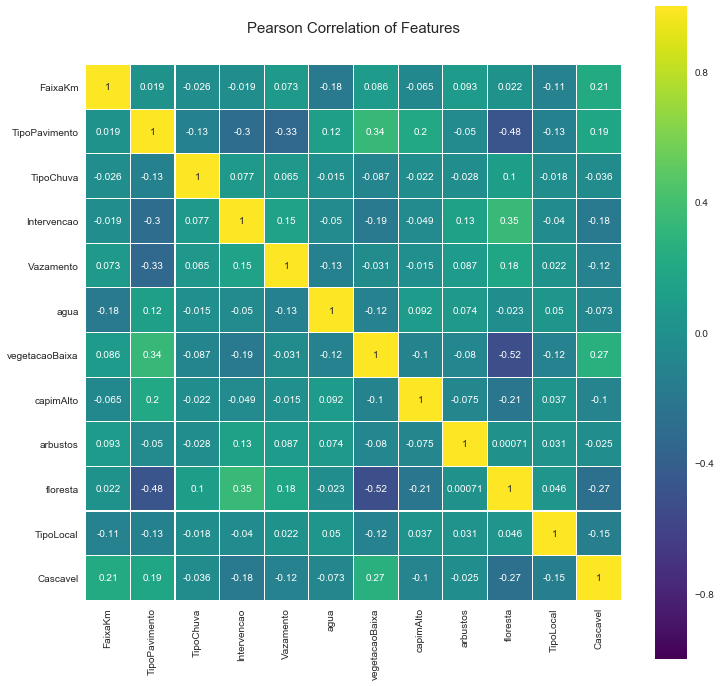

In [11]:
cascadc = reptdc.drop(['codAnimal', 'Reptil'], axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cascadc.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Fazendo a mesma associação entre os dados e os atributos

In [12]:
headers = ['FaixaKm','TipoPavimento','TipoChuva','Intervencao',
           'Vazamento','agua','vegetacaoBaixa','capimAlto','arbustos','floresta','TipoLocal','Cascavel']
for i in range(len(headers)):
    cascadc[headers[i]] = headers[i]+'='+cascadc[headers[i]].apply(str)

cascadc.head()

,FaixaKm,TipoPavimento,TipoChuva,Intervencao,Vazamento,agua,vegetacaoBaixa,capimAlto,arbustos,floresta,TipoLocal,Cascavel
69,FaixaKm=2,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=1,agua=1,vegetacaoBaixa=1,capimAlto=1,arbustos=0,floresta=0,TipoLocal=5,Cascavel=0
117,FaixaKm=5,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=1,agua=0,vegetacaoBaixa=1,capimAlto=1,arbustos=0,floresta=0,TipoLocal=6,Cascavel=0
214,FaixaKm=5,TipoPavimento=1,TipoChuva=1,Intervencao=0,Vazamento=1,agua=0,vegetacaoBaixa=0,capimAlto=0,arbustos=1,floresta=1,TipoLocal=6,Cascavel=0
219,FaixaKm=4,TipoPavimento=4,TipoChuva=1,Intervencao=0,Vazamento=1,agua=1,vegetacaoBaixa=1,capimAlto=1,arbustos=0,floresta=0,TipoLocal=6,Cascavel=0
274,FaixaKm=6,TipoPavimento=1,TipoChuva=1,Intervencao=0,Vazamento=1,agua=1,vegetacaoBaixa=1,capimAlto=0,arbustos=1,floresta=0,TipoLocal=7,Cascavel=0


Aplicamos um apriori com as mesmas configurações para todas as Aves.

In [13]:
listcasca = []
for i in range(len(cascadc)):
    listcasca.append([str(cascadc.values[i, j]) for j in range(0, 12)])

from apyori import apriori
regras = apriori(listcasca, min_support=0.03, min_confidence=0.8, min_lenght=2)

resultados = list(regras)
resultados2 = [list(x) for x in resultados]
resultadosFormatado = []
for j in range(0,3000):#numero de regras que deseja mostrar
       resultadosFormatado.append([list(x) for x in resultados2[j][2]])
resultdf = pd.DataFrame(resultadosFormatado)
resultdf.to_csv('cascaregras.csv', index=False, header=False)

Porem por mais que aumentemos a quantidade de regras não foi possivel achar nenhuma associação entre o Anú-Preto e as Faixas de Km

|SE|E|E|ENTÃO|SUPORTE|LIFT|
|:---|:---|:---|:---|:---|
|FaixaKm=9|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|FaixaKm=9|Cascavel=1||TipoChuva=1|0.9565217391304348|0.9925768822905621|
|FaixaKm=9|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1||agua=0|0.9565217391304348|1.233201581027668|
|FaixaKm=9|Cascavel=1||capimAlto=0|0.9565217391304348|1.18114030056212|
|FaixaKm=9|Cascavel=1||floresta=0|0.9565217391304348|1.83464005702067|
|FaixaKm=9|Cascavel=1||vegetacaoBaixa=1|0.9130434782608696|1.916162994735816|
|Intervencao=0|Cascavel=1||TipoChuva=1|0.9803921568627451|1.0173470718664406|
|TipoChuva=1|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|TipoLocal=5|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||Intervencao=0|1.0|1.2648648648648648|
|Vazamento=0|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|Cascavel=1||agua=0|0.8627450980392156|1.1122994652406415|
|Cascavel=1|agua=0||Intervencao=0|1.0|1.2648648648648648|
|arbustos=0|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|Cascavel=1||capimAlto=0|0.9215686274509804|1.1379792022349837|
|capimAlto=0|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|Cascavel=1||floresta=0|0.9019607843137255|1.729990356798457|
|floresta=0|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|Cascavel=1||vegetacaoBaixa=1|0.8627450980392156|1.8106040622527038|
|vegetacaoBaixa=1|Cascavel=1||Intervencao=0|1.0|1.2648648648648648|
|TipoLocal=5|Cascavel=1||TipoChuva=1|1.0|1.0376940133037693|
|TipoChuva=1|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||TipoChuva=1|0.9803921568627451|1.0173470718664406|
|Vazamento=0|Cascavel=1||TipoChuva=1|0.972972972972973|1.0096482291604243|
|TipoChuva=1|Cascavel=1||agua=0|0.8600000000000001|1.1087603305785125|
|Cascavel=1|agua=0||TipoChuva=1|0.9772727272727274|1.0141100584559566|
|arbustos=0|Cascavel=1||TipoChuva=1|1.0|1.0376940133037693|
|TipoChuva=1|Cascavel=1||capimAlto=0|0.92|1.136042216358839|
|capimAlto=0|Cascavel=1||TipoChuva=1|0.9787234042553191|1.0156154172760297|
|TipoChuva=1|Cascavel=1||floresta=0|0.9000000000000001|1.7262295081967214|
|floresta=0|Cascavel=1||TipoChuva=1|0.9782608695652175|1.015135447797166|
|TipoChuva=1|Cascavel=1||vegetacaoBaixa=1|0.8600000000000001|1.8048430493273546|
|vegetacaoBaixa=1|Cascavel=1||TipoChuva=1|0.9772727272727274|1.0141100584559566|
|TipoLocal=5|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|TipoLocal=5|Cascavel=1||agua=0|0.8333333333333333|1.0743801652892562|
|TipoLocal=5|Cascavel=1||capimAlto=0|0.9166666666666666|1.1319261213720315|
|TipoLocal=5|Cascavel=1||floresta=0|0.861111111111111|1.6516393442622948|
|TipoLocal=5|Cascavel=1||vegetacaoBaixa=1|0.861111111111111|1.8071748878923766|
|Vazamento=0|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||agua=0|0.8627450980392156|1.1122994652406415|
|Cascavel=1|agua=0||TipoPavimento=4|1.0|1.2963988919667588|
|arbustos=0|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||capimAlto=0|0.9215686274509804|1.1379792022349837|
|capimAlto=0|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||floresta=0|0.9019607843137255|1.729990356798457|
|floresta=0|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Cascavel=1|TipoPavimento=4||vegetacaoBaixa=1|0.8627450980392156|1.8106040622527038|
|vegetacaoBaixa=1|Cascavel=1||TipoPavimento=4|1.0|1.2963988919667588|
|Vazamento=0|Cascavel=1||agua=0|0.8378378378378378|1.080187625642171|
|Vazamento=0|Cascavel=1||capimAlto=0|0.9189189189189191|1.1347072666333882|
|Vazamento=0|Cascavel=1||floresta=0|0.8918918918918919|1.7106778910057596|
|Vazamento=0|Cascavel=1||vegetacaoBaixa=1|0.8918918918918919|1.8717731184098898|
|arbustos=0|Cascavel=1||agua=0|0.864864864864865|1.1150323877596606|
|Cascavel=1|agua=0||capimAlto=0|0.9090909090909092|1.1225713600383787|
|capimAlto=0|Cascavel=1||agua=0|0.851063829787234|1.097239317742219|
|Cascavel=1|agua=0||floresta=0|0.9545454545454546|1.8308494783904619|
|floresta=0|Cascavel=1||agua=0|0.9130434782608696|1.1771469637082286|
|Cascavel=1|agua=0||vegetacaoBaixa=1|0.8863636363636364|1.8601712189156137|
|vegetacaoBaixa=1|Cascavel=1||agua=0|0.8863636363636364|1.1427498121712998|
|arbustos=0|Cascavel=1||capimAlto=0|0.9189189189189191|1.1347072666333882|
|arbustos=0|Cascavel=1||floresta=0|0.8918918918918919|1.7106778910057596|
|arbustos=0|Cascavel=1||vegetacaoBaixa=1|0.8918918918918919|1.8717731184098898|
|capimAlto=0|Cascavel=1||floresta=0|0.8936170212765957|1.7139867457272409|
|floresta=0|Cascavel=1||capimAlto=0|0.9130434782608696|1.1274521050820236|
|capimAlto=0|Cascavel=1||vegetacaoBaixa=1|0.9148936170212766|1.92004579715676|
|vegetacaoBaixa=1|Cascavel=1||capimAlto=0|0.9772727272727274|1.206764212041257|
|floresta=0|Cascavel=1||vegetacaoBaixa=1|0.8913043478260869|1.8705400662897251|
|vegetacaoBaixa=1|Cascavel=1||floresta=0|0.9318181818181818|1.7872578241430699|
|Intervencao=0|FaixaKm=9|Cascavel=1|TipoChuva=1|0.9565217391304348|0.9925768822905621|
|TipoChuva=1|FaixaKm=9|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|FaixaKm=9|TipoLocal=5|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|FaixaKm=9|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|Intervencao=0|1.0|1.2648648648648648|
|Vazamento=0|FaixaKm=9|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|FaixaKm=9|Cascavel=1|agua=0|0.9565217391304348|1.233201581027668|
|FaixaKm=9|Cascavel=1|agua=0|Intervencao=0|1.0|1.2648648648648648|
|FaixaKm=9|arbustos=0|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|FaixaKm=9|Cascavel=1|capimAlto=0|0.9565217391304348|1.18114030056212|
|FaixaKm=9|capimAlto=0|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|FaixaKm=9|Cascavel=1|floresta=0|0.9565217391304348|1.83464005702067|
|FaixaKm=9|floresta=0|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|Intervencao=0|FaixaKm=9|Cascavel=1|vegetacaoBaixa=1|0.9130434782608696|1.916162994735816|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|Intervencao=0|1.0|1.2648648648648648|
|FaixaKm=9|TipoLocal=5|Cascavel=1|TipoChuva=1|1.0|1.0376940133037693|
|TipoChuva=1|FaixaKm=9|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|TipoChuva=1|0.9565217391304348|0.9925768822905621|
|Vazamento=0|FaixaKm=9|Cascavel=1|TipoChuva=1|0.9444444444444444|0.9800443458980044|
|TipoChuva=1|FaixaKm=9|Cascavel=1|agua=0|0.9545454545454546|1.2306536438767843|
|FaixaKm=9|Cascavel=1|agua=0|TipoChuva=1|0.9545454545454546|0.9905261036081435|
|FaixaKm=9|arbustos=0|Cascavel=1|TipoChuva=1|1.0|1.0376940133037693|
|TipoChuva=1|FaixaKm=9|Cascavel=1|capimAlto=0|0.9545454545454546|1.1786999280402974|
|FaixaKm=9|capimAlto=0|Cascavel=1|TipoChuva=1|0.9545454545454546|0.9905261036081435|
|TipoChuva=1|FaixaKm=9|Cascavel=1|floresta=0|0.9545454545454546|1.8308494783904619|
|FaixaKm=9|floresta=0|Cascavel=1|TipoChuva=1|0.9545454545454546|0.9905261036081435|
|TipoChuva=1|FaixaKm=9|Cascavel=1|vegetacaoBaixa=1|0.9090909090909092|1.907867916836527|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|TipoChuva=1|0.9523809523809524|0.9882800126702567|
|FaixaKm=9|TipoLocal=5|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|Vazamento=0|FaixaKm=9|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|agua=0|0.9565217391304348|1.233201581027668|
|FaixaKm=9|Cascavel=1|agua=0|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|arbustos=0|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|capimAlto=0|0.9565217391304348|1.18114030056212|
|FaixaKm=9|capimAlto=0|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|floresta=0|0.9565217391304348|1.83464005702067|
|FaixaKm=9|floresta=0|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|FaixaKm=9|Cascavel=1|TipoPavimento=4|vegetacaoBaixa=1|0.9130434782608696|1.916162994735816|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|TipoPavimento=4|1.0|1.2963988919667588|
|Vazamento=0|FaixaKm=9|Cascavel=1|agua=0|0.9444444444444444|1.2176308539944902|
|Vazamento=0|FaixaKm=9|Cascavel=1|capimAlto=0|1.0|1.2348284960422165|
|FaixaKm=9|capimAlto=0|Cascavel=1|Vazamento=0|0.8181818181818182|1.4670846394984327|
|Vazamento=0|FaixaKm=9|Cascavel=1|floresta=0|0.9444444444444444|1.8114754098360655|
|Vazamento=0|FaixaKm=9|Cascavel=1|vegetacaoBaixa=1|0.9444444444444444|1.9820627802690585|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|Vazamento=0|0.8095238095238095|1.451559934318555|
|FaixaKm=9|Cascavel=1|agua=0|capimAlto=0|0.9545454545454546|1.1786999280402974|
|FaixaKm=9|capimAlto=0|Cascavel=1|agua=0|0.9545454545454546|1.2306536438767843|
|FaixaKm=9|Cascavel=1|agua=0|floresta=0|1.0|1.9180327868852458|
|FaixaKm=9|floresta=0|Cascavel=1|agua=0|1.0|1.2892561983471074|
|FaixaKm=9|Cascavel=1|agua=0|vegetacaoBaixa=1|0.9090909090909092|1.907867916836527|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|agua=0|0.9523809523809524|1.2278630460448643|
|FaixaKm=9|capimAlto=0|Cascavel=1|floresta=0|0.9545454545454546|1.8308494783904619|
|FaixaKm=9|floresta=0|Cascavel=1|capimAlto=0|0.9545454545454546|1.1786999280402974|
|FaixaKm=9|capimAlto=0|Cascavel=1|vegetacaoBaixa=1|0.9545454545454546|2.003261312678353|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|capimAlto=0|1.0|1.2348284960422165|
|FaixaKm=9|floresta=0|Cascavel=1|vegetacaoBaixa=1|0.9090909090909092|1.907867916836527|
|vegetacaoBaixa=1|FaixaKm=9|Cascavel=1|floresta=0|0.9523809523809524|1.8266978922716628|